# Example notebook to show how to work with sxs waveforms

In [1]:
from gw_eccentricity.load_data import load_sxs_catalogformat
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
load_sxs_catalogformat?

Signature: load_sxs_catalogformat(**kwargs)
Docstring:
Load modes from sxs waveform files in sxs catalog format.

This function is intended for loading waveform modes from files in
the sxs catalog format (see
https://data.black-holes.org/waveforms/documentation.html).
For loading lvcnr format files, see `load_lvcnr_waveform`.

parameters:
----------
kwargs: Dictionary with the followings keys
filepath: str
    Path to waveform file in sxs format. The name of the file is
    usually `rhOverM_Asymptotic_GeometricUnits_CoM.h5`.
    This must be provided to load waveform modes.
    Default is None which raises exception.

dt: float
    Time step to use for interpolating the waveform modes.
    The unit is the same as the time array in the sxs format
    waveform file which is dimensionless.
    Default is 0.1

include_zero_ecc: bool
    If True, returns `IMRPhenomT` waveform mode (only (2, 2) mode)
    for the same set of parameters except eccentricity set to
    zero.  Requires metadata f

In [4]:
kwargs = {"filepath": "/home/arif/nr_data/rhOverM_Asymptotic_GeometricUnits_CoM.h5",
         "mode_array": [(2, 2)],
         "include_zero_ecc": True,
         "metadata_path": "/home/arif/nr_data/metadata.txt"}
dataDict = load_sxs_catalogformat(**kwargs)

In [5]:
dataDict

{'t': array([-8418.33990618, -8418.23990618, -8418.13990618, ...,
          195.36009382,   195.46009382,   195.56009382]),
 'hlm': {(2,
   2): array([-5.26076443e-03-1.08046325e-01j, -5.62820650e-03-1.08013477e-01j,
         -5.99542037e-03-1.07979324e-01j, ...,
          7.27045392e-07-3.73856190e-06j,  7.28024553e-07-3.74164541e-06j,
          7.28834405e-07-3.74474991e-06j])},
 'params_dict': {'q': 1.0000000456299243,
  'chi1': [4.05441232824e-10, -2.49756503677e-10, -9.8154130957e-07],
  'chi2': [-2.16816374472e-10, -8.13804850684e-12, -9.98462630979e-07]},
 't_zeroecc': array([-8419.30250567, -8419.20250567, -8419.10250567, ...,
          499.69749433,   499.79749433,   499.89749433]),
 'hlm_zeroecc': {(2,
   2): array([ 1.46986525e-04+8.16816104e-02j,  3.54523457e-04+8.16811986e-02j,
          5.62060128e-04+8.16802595e-02j, ...,
         -1.22791381e-21+2.76094152e-19j,  1.39279272e-20+2.73393714e-19j,
          2.87837173e-20+2.69889063e-19j])}}

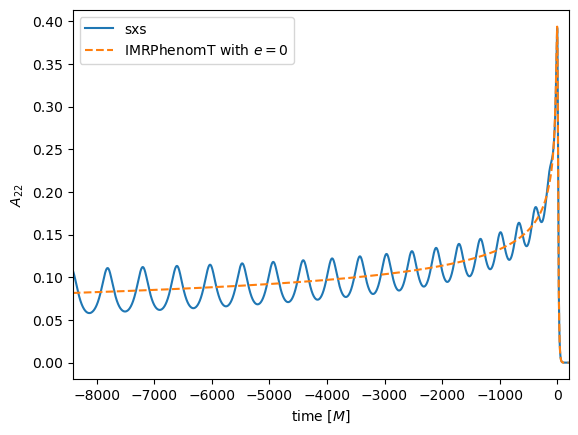

In [10]:
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
plt.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), label=r"IMRPhenomT with $e=0$", ls="--")
plt.xlim(dataDict["t"][0], 200)
plt.xlabel(r"time [$M$]")
plt.ylabel(r"$A_{22}$")
plt.legend(loc="upper left")